In [59]:
#importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use("seaborn-v0_8-darkgrid")

In [66]:
'''
leitura da base de dados
fonte: Guilherme Albuquerque - https://www.kaggle.com/datasets/guilhermegoncalves/vacinao-brasil-microdados
feito uma filtragem para apenas os dados de volta redonda e vacinados
gerado o arquivo volta_redonda_vacina.csv
'''
volta_redonda = pd.read_csv('volta_redonda_vacina.csv', parse_dates=['data_aplicacao'])

In [67]:
volta_redonda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7455 entries, 0 to 7454
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   paciente_codigo_grupo                  7455 non-null   float64       
 1   vacina                                 7455 non-null   object        
 2   vacina_lote                            7455 non-null   object        
 3   estabelecimento_razao_social           7455 non-null   object        
 4   estabelecimento                        7455 non-null   object        
 5   paciente_cep                           4147 non-null   float64       
 6   estabelecimento_unidade_federativa     7455 non-null   object        
 7   sistema_origem                         7455 non-null   object        
 8   paciente_municipio                     7425 non-null   object        
 9   paciente_etnia                         5052 non-null   object  

In [68]:
#fazer um drop nas linhas na qual data_aplicacao está vazia
volta_redonda.dropna(subset=['data_aplicacao'], inplace=True)
#volta_redonda = volta_redonda.drop(['data_aplicacao'], axis=1, inplace=True)

In [69]:
volta_redonda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7364 entries, 0 to 7454
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   paciente_codigo_grupo                  7364 non-null   float64       
 1   vacina                                 7364 non-null   object        
 2   vacina_lote                            7364 non-null   object        
 3   estabelecimento_razao_social           7364 non-null   object        
 4   estabelecimento                        7364 non-null   object        
 5   paciente_cep                           4084 non-null   float64       
 6   estabelecimento_unidade_federativa     7364 non-null   object        
 7   sistema_origem                         7364 non-null   object        
 8   paciente_municipio                     7334 non-null   object        
 9   paciente_etnia                         4983 non-null   object       

In [70]:
volta_redonda.groupby([volta_redonda["data_aplicacao"].dt.month, volta_redonda['paciente_sexo_biologico']])['vacina'].count()

data_aplicacao  paciente_sexo_biologico
1               F                          2114
                M                           752
2               F                          3345
                M                          1153
Name: vacina, dtype: int64

In [71]:
volta_redonda.groupby([volta_redonda["data_aplicacao"].dt.month, volta_redonda['estabelecimento']])['vacina'].count()

data_aplicacao  estabelecimento                                      
1               CENTRAL MUNICIPAL DE REDE DE FRIOS CMRF VOLTA REDONDA      9
                HINJA                                                     73
                HOSPITAL DR NELSON DOS SANTOS GONCALVES                  168
                HOSPITAL MUNICIPAL DR MUNIR RAFFUL                       179
                HOSPITAL MUNICIPAL SAO JOAO BATISTA                      605
                                                                        ... 
2               UBSF VILA BRASILIA MARIA DIAS DE ASSIS                    13
                UBSF VILA MURY FERNANDO MARIO NETTO                      299
                UBSF VILA RICA JARDIM TIRADENTES DR OSWALDO RICHIERI      63
                UBSF VILA RICA TRES POCOS VINICIUS BOBINS S SILVA          1
                UPA 24 HS VOLTA REDONDA                                   17
Name: vacina, Length: 77, dtype: int64

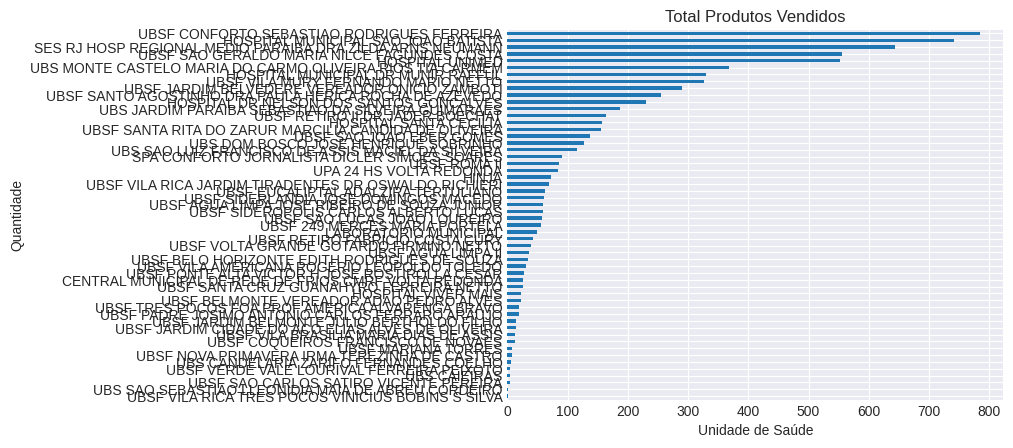

In [72]:
volta_redonda.groupby([volta_redonda['estabelecimento']])['vacina'].count().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Unidade de Saúde")
plt.ylabel("Quantidade");

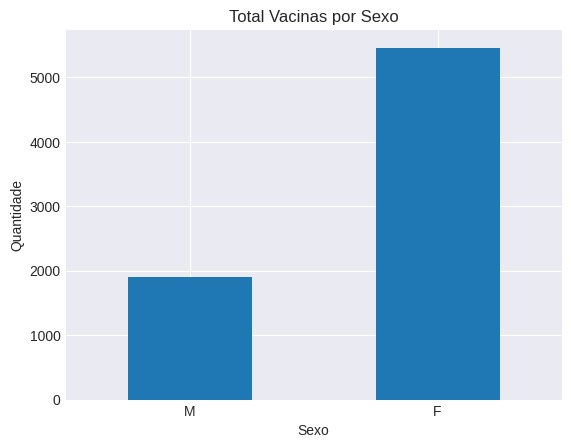

In [73]:
volta_redonda.groupby([volta_redonda['paciente_sexo_biologico']])['vacina'].count().sort_values(ascending=True).plot.bar(title="Total Vacinas por Sexo")
plt.xlabel("Sexo")
plt.ylabel("Quantidade")
plt.xticks(rotation='horizontal');

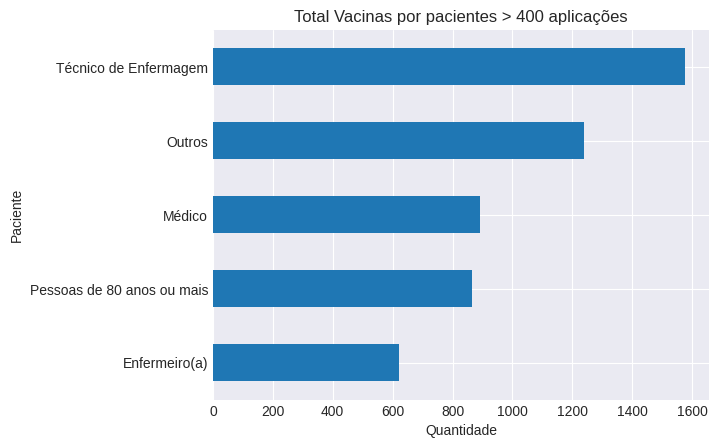

In [74]:
volta_redonda.groupby([volta_redonda['paciente_subgrupo']])['vacina'].count().loc[lambda x: x > 400].sort_values(ascending=True).plot.barh(title="Total Vacinas por pacientes > 400 aplicações")
plt.xlabel("Quantidade")
plt.ylabel("Paciente")
plt.xticks(rotation='horizontal');


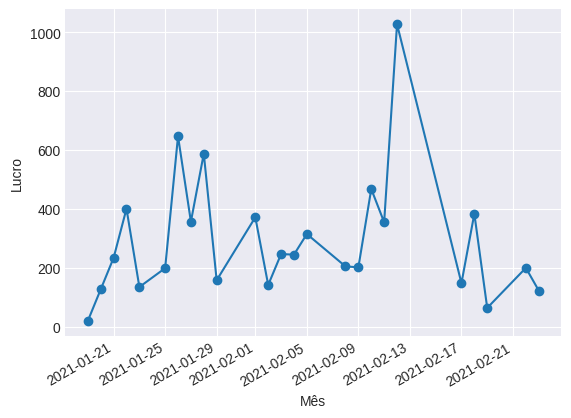

In [75]:
volta_redonda.groupby([volta_redonda["data_aplicacao"]])['vacina'].count().plot(marker='o')
plt.xlabel("Mês")
plt.ylabel("Vacinas");